# 1. Poner título a los datasets, eliminar duplicados y guardar en excel

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
mainpath = "../datasets-tfg"
filename = "conferencias con nombres"
fullpath = os.path.join(mainpath, filename)

lista = os.listdir(fullpath) #Obtenemos la lista de todos los archivos de la carpeta "Conferencias con nombres"

In [7]:
#Vamos a crear la carpeta conferencias v1, donde vamos a guardar todas las conferencias prepreprocesadas, con sus respectivas gráficas
mainpath = "../datasets-tfg"
filename = "conferencias v1"
fullpath = os.path.join(mainpath, filename)

#Comprobamos si la carpeta ya existe
fileExists = os.path.isdir('../datasets-tfg/conferencias v1')
if fileExists == False:
    os.makedirs(fullpath) #creamos una carpeta, donde posteriormente almacenaremos los csv de las conferencias una vez procesados

In [8]:
#Vamos a crear la carpeta csv, donde vamos a guardar todos los csv de las conferencias una vez preprocesadas
mainpath = "../datasets-tfg/conferencias v1"

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/csv completo')
if fileExists == False:
    os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/csv cortado')
if fileExists == False:
    os.makedirs(fullpath)
    
#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/graficas')
if fileExists == False:
    os.makedirs(fullpath)

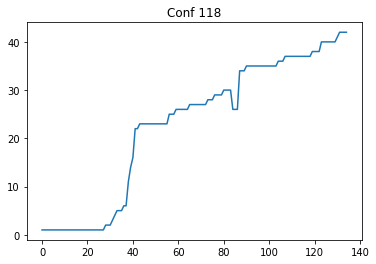

In [9]:
#Estos son los títulos que queremos para cada columna
conf1_cols=["Fecha", "Enviados", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "Aceptados", "Porcentaje aceptados","Rechazados",
            "Borrados","Registrados","Sin version final","Desconocido"]

filepath = "../datasets-tfg/conferencias con nombres/"

for i in range (0, 119): #En el in range no entra el último
    filename = str(lista[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.reset_index(drop=True)
    filepath3 = "../datasets-tfg/conferencias v1/csv completo/"
    temp_data.to_csv(filepath3 + 'Conf' + str(i) + '.csv', index=False)
    temp_data = temp_data.drop(temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index)
    filepath1 = "../datasets-tfg/conferencias v1/csv cortado/"
    temp_data.to_csv(filepath1 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    filepath2 = "../datasets-tfg/conferencias v1/graficas/"
    plt.savefig(filepath2 + "Grafica Conf " + str(i) + ".jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)

# 2. Recorte automático de curvas por escalones y guardado en fichero

In [10]:
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas')
if fileExists == False:
    os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/csv curvas')
if fileExists == False:
    os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/graficas curvas')
if fileExists == False:
    os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/picos para division')
if fileExists == False:
    os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/conf dividida')
if fileExists == False:
    os.makedirs(fullpath)

In [11]:
from scipy.signal import find_peaks

C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:633: RuntimeWarning: invalid value encountered in less_equal
  keep &= (pmin <= peak_properties)
C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:633: RuntimeWarning: invalid value encountered in less_equal
  keep &= (pmin <= peak_properties)
C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py

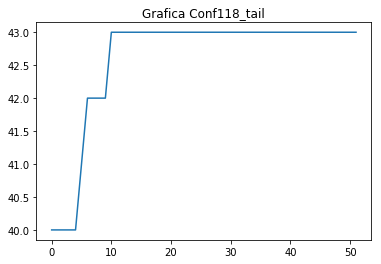

In [12]:
filepath = "../datasets-tfg/conferencias v1/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/curvas/"

#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('Nombre curva', 'Escalon'))

for i in range (0, 119): #En el in range no entra el último
    
    filename = "Conf" + str(i)
    file = filepath + filename + ".csv"
    
    #Df completo
    df = pd.read_csv(file)             
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/csv cortado/" + "Conf" + str(i)+ ".csv")
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
    #Suavizamos la derivada haciendo la media
    deriv2 = (deriv1[0]+deriv1[1]+deriv1[2]+ deriv1[3]+deriv1[4]+ deriv1[5]+deriv1[6])/5
    deriv2 = [deriv2]

    for k in range (4, m-4):
        d = (deriv1[k-3]+deriv1[k-2]+deriv1[k-1]+deriv1[k]+deriv1[k+1]+deriv1[k+2]+deriv1[k+3])/5
        deriv2.append(d)
    
    deriv3 = np.asarray(deriv2)
    
    n = len(deriv3)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4 = (deriv3[0]+deriv3[1]+deriv3[2]+ deriv3[3]+deriv3[4]+ deriv3[5]+deriv3[6])/5
    deriv4 = [deriv4]

    for l in range (4, n-3):
        d = (deriv3[l-3]+deriv3[l-2]+deriv3[l-1]+deriv3[l]+deriv3[l+1]+deriv3[l+2]+deriv3[l+3])/5
        deriv4.append(d)
    
    deriv5 = np.asarray(deriv4)
    
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    
    
    #Suavizamos la derivada haciendo la media
    deriv2_cortada = (deriv1_cortada[0]+deriv1_cortada[1]+deriv1_cortada[2]+ deriv1_cortada[3]+deriv1_cortada[4]+ deriv1_cortada[5]+deriv1_cortada[6])/5
    deriv2_cortada = [deriv2_cortada]

    for k in range (4, h-4):
        d = (deriv1_cortada[k-3]+deriv1_cortada[k-2]+deriv1_cortada[k-1]+deriv1_cortada[k]+deriv1_cortada[k+1]+deriv1_cortada[k+2]+deriv1_cortada[k+3])/5
        deriv2_cortada.append(d)
    
    deriv3_cortada = np.asarray(deriv2_cortada)
    
    r = len(deriv3_cortada)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4_cortada = (deriv3_cortada[0]+deriv3_cortada[1]+deriv3_cortada[2]+ deriv3_cortada[3]+deriv3_cortada[4]+ deriv3_cortada[5]+deriv3_cortada[6])/5
    deriv4_cortada = [deriv4_cortada]

    for l in range (4, r-3):
        d = (deriv3_cortada[l-3]+deriv3_cortada[l-2]+deriv3_cortada[l-1]+deriv3_cortada[l]+deriv3_cortada[l+1]+deriv3_cortada[l+2]+deriv3_cortada[l+3])/5
        deriv4_cortada.append(d)
    
    deriv5_cortada = np.asarray(deriv4_cortada)
        
    p = np.amax(deriv5) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv5)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv5, height=p)
    
    %matplotlib inline
    r = len(deriv5_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv5_cortada)
    plt.plot(peaks, deriv5[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    pcorte=peaks
    for c in range (0, len(peaks)):
        pcorte[c]=pcorte[c]+9
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(pcorte, env_vect[pcorte], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    n = len(peaks)
    error = 0

    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)

# 3. Escalado de las curvas

In [13]:
mainpath = "../datasets-tfg/conferencias v1/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/csv curvas escaladas')
if fileExists == False:
    os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/graficas curvas escaladas')
if fileExists == False:
    os.makedirs(fullpath)

In [14]:
#Obtenemos la lista de todos los archivos de la carpeta "csv curvas"
lista1 = os.listdir("../datasets-tfg/conferencias v1/curvas/csv curvas")

n = len(lista1) #número de archivos en la carpeta

C:\Users\carmengarut\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in longlong_scalars


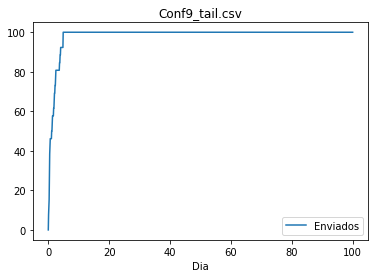

In [15]:
filepath = "../datasets-tfg/conferencias v1/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/curvas/csv curvas escaladas/"

for i in range (0, n): #En el in range no entra el último
    filename = str(lista1[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    
    EnviadosEsc = (Enviados+Offset)*FactorY
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
    
    data.to_csv(filepath1 + str(lista1[i]), index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(lista1[i])) 
    
    filepath2 = "../datasets-tfg/conferencias v1/curvas/graficas curvas escaladas/"
    plt.savefig(filepath2 + str(lista1[i]) + ".jpg")


# 4. Modelización de las curvas

In [16]:
filepath2= "../datasets-tfg/conferencias v1/curvas/"

mapa = pd.read_csv("../datasets-tfg/conferencias v1/curvas/Mapa.csv")

#Declaramos un dataframe vacio
mapa2 = pd.DataFrame(columns=('Nombre curva', 'Escalon'))

n = len(mapa["Nombre curva"])

for i in range (0,n):
    if mapa["Escalon"][i]!=-1:
        mapa2.loc[len(mapa2)]=[mapa["Nombre curva"][i], mapa["Escalon"][i]] 

mapa2.to_csv(filepath2 + 'Mapa curvas.csv', index=False)                            

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)


In [11]:
mainpath = "../datasets-tfg/conferencias v1/curvas"

mapa = pd.read_csv("../datasets-tfg/conferencias v1/curvas/Mapa.csv")

#Creamos la carpeta graficas modelos curvas
fullpath = os.path.join(mainpath, "graficas modelos")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/curvas/graficas modelos')
if fileExists == False:
    os.makedirs(fullpath)

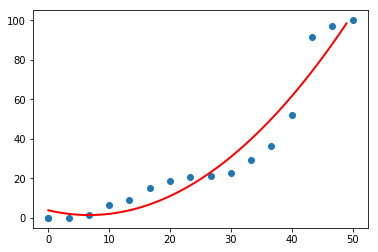

In [12]:
filepath = "../datasets-tfg/conferencias v1/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/curvas/graficas modelos/"

ndias=50
#Declaramos un dataframe vacio
mapa2 = pd.DataFrame(columns=('Escalon','Grado','c0','c1','c2','c3','c4','c5','c6'))

mapa = pd.read_csv("../datasets-tfg/conferencias v1/curvas/Mapa curvas.csv")

#Añado nuevas columnas, donde vamos a almacenar el grado y los coef de la regresión polinomial que mejor se ajusta


n = len(mapa["Nombre curva"])

matrizR2 = np.zeros(shape=(n,6))
R2media = []


for k in range (1,7):
    i=0
    x=0
    y=0
    while i<n:
        filename = mapa["Nombre curva"][i] + '.csv'
        file = os.path.join(filepath, filename)
    
        temp_data = pd.read_csv(file)
        if mapa["Escalon"][i]==k:
            if i==0:
                y = temp_data["Enviados"]
                x = temp_data["Dia"]
            else: 
                y = np.append(y,temp_data["Enviados"])
                x = np.append(x,temp_data["Dia"])
        
        i=i+1
    x=x/100*50
    m=len(y)
    x = x[:, np.newaxis] #Ponemos [:, np.newaxis] porque la función necesita que le pasen un dataframe y X es solo una columna
    
    # Separamos los datos de entrenamiento y prueba
    x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    coef0=[0, 0, 0, 0, 0, 0]
    coef1=[0, 0, 0, 0, 0, 0]
    coef2=[0, 0, 0, 0, 0, 0]
    coef3=[0, 0, 0, 0, 0, 0]
    coef4=[0, 0, 0, 0, 0, 0]
    coef5=[0, 0, 0, 0, 0, 0]
    coef6=[0, 0, 0, 0, 0, 0]
    R2=np.zeros(6)
    
    grado=1
    while grado<7:
        
        #Se define el grado del polinomio
        poli_reg = PolynomialFeatures(degree =grado)
        
        #Se transforma las características existentes en características de mayor grado
        x_train_poli = poli_reg.fit_transform(x_train)
        x_test_poli = poli_reg.fit_transform(x_test)
        
        #Defino el algoritmo a utilizar
        pr = LinearRegression()
        
        #Entreno el modelo
        pr.fit(x_train_poli, y_train)

        #Realizo una predicción
        y_pred_pr = pr.predict(x_test_poli)
        coef0[grado-1] = pr.intercept_
        coef1[grado-1] = pr.coef_[1]
        
        if grado>1:
            coef2[grado-1] = pr.coef_[2]
            if grado>2:
                coef3[grado-1] = pr.coef_[3]
                if grado>3:
                    coef4[grado-1] = pr.coef_[4]
                    if grado>4:
                        coef5[grado-1] = pr.coef_[5]
                        if grado>5:
                            coef6[grado-1] = pr.coef_[6]
    
        R2[grado-1]=pr.score(x_test_poli, y_test)
        
        if R2[grado-1]>=0:
            grado=grado+1
    
#if np.all(R2>=0):
    #matrizR2[i] = R2
    R2p=0
    grado=0
    for a in range (0, 6):
        if R2[a]>R2p:
            R2p=R2[a]
            grado=a+1
            
    x_test=np.arange(0,ndias,1)
    x_test = x_test[:, np.newaxis]
    
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree =grado)
        
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
        
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
        
    #Entreno el modelo
    pr.fit(x_train_poli, y)
        
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
        
    c0 = pr.intercept_
    c1 = pr.coef_[1]
        
    if grado>1:
        c2 = pr.coef_[2]
        if grado>2:
            c3 = pr.coef_[3]
            if grado>3:
                c4 = pr.coef_[4]
                if grado>4:
                    c5 = pr.coef_[5]
                    if grado>5:
                        c6 = pr.coef_[6]
                            

    
    mapa2.loc[len(mapa2)]=[k,grado,c0,c1,c2,c3,c4,c5,c6] 
    
    a= np.arange(0,100,1)
    %matplotlib inline
    graf = coef0[grado-1] + coef1[grado-1]*a + coef2[grado-1]*(a**2) + coef3[grado-1]*(a**3) + coef4[grado-1]*(a**4) + coef5[grado-1]*(a**5) + coef6[grado-1]*(a**6)
    plt.scatter(x, y)
    plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
    #plt.title(mapa["Nombre curva"][i]) 
    plt.savefig(filepath3 + 'Grafica Escalon' + str(k) + 'grado' + str(grado))


mapa2.to_csv(filepath2 + 'MapaModeloEscalones.csv', index=False)
        


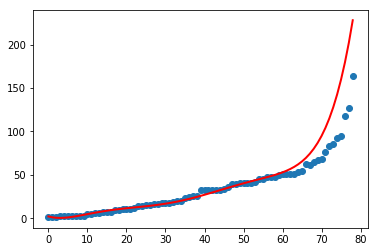

In [15]:
filepath = "../datasets-tfg/conferencias v1/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/curvas/graficas modelos/"

#Escogemos el df con el que vamos a hacer la prueba
prueba = pd.read_csv("../datasets-tfg/conferencias v1/curvas/csv curvas/Conf4_C1.csv")
ndias=len(prueba)
k=1 #Escalon
x_test= np.arange(0,round(4*ndias/5),1)
x_test = x_test[:, np.newaxis]
drop= np.arange(round(4*ndias/5),ndias,1)
prueba1 = prueba.drop(drop)
y_test = prueba1["Enviados"]
y_test1 = prueba["Enviados"]
x_test1= np.arange(0,ndias,1)
x_test1 = x_test1[:, np.newaxis]
mapa = pd.read_csv("../datasets-tfg/conferencias v1/curvas/Mapa curvas.csv")

#Añado nuevas columnas, donde vamos a almacenar el grado y los coef de la regresión polinomial que mejor se ajusta


n = len(mapa["Nombre curva"])

matrizR2 = np.zeros(shape=(n,6))
R2media = []



i=0
x=0
y=0
while i<n:
    filename = mapa["Nombre curva"][i] + '.csv'
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    if mapa["Escalon"][i]==k:
        if i==0:
            y = temp_data["Enviados"]
            x = temp_data["Dia"]
        else: 
            y = np.append(y,temp_data["Enviados"])
            x = np.append(x,temp_data["Dia"])
        
    i=i+1
x=x/100*ndias
x = x[:, np.newaxis]
grado=6
R2=[]
for h in range (50,300):

    y1=y/100*h
    m=len(y)
     #Ponemos [:, np.newaxis] porque la función necesita que le pasen un dataframe y X es solo una columna
    
      
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree =6)
        
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
        
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
        
    #Entreno el modelo
    pr.fit(x_train_poli, y1)

    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)

    %matplotlib inline
    plt.scatter(x_test1, y_test1)
    plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
    plt.savefig(filepath3 + 'XGrafica h' + str(h) )
    #plt.title(mapa["Nombre curva"][i]) 

    R2.append(pr.score(x_test_poli, y_test))
    
    

#if np.all(R2>=0):
    #matrizR2[i] = R2
R2p=0
escala=0
for a in range (0, len(R2)):
    if R2[a]>R2p:
        R2p=R2[a]
        escala=a+50
            
#x_test=np.arange(0,ndias,1)
#x_test = x_test[:, np.newaxis]
y1=y/100*escala
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree =grado)
        
#Se transforma las características existentes en características de mayor grado
x_train_poli = poli_reg.fit_transform(x)
x_test_poli = poli_reg.fit_transform(x_test1)
        
#Defino el algoritmo a utilizar
pr = LinearRegression()
        
#Entreno el modelo
pr.fit(x_train_poli, y1)
        
#Realizo una predicción
y_pred_pr = pr.predict(x_test_poli)
        
c0 = pr.intercept_
c1 = pr.coef_[1]
        
if grado>1:
    c2 = pr.coef_[2]
    if grado>2:
        c3 = pr.coef_[3]
        if grado>3:
            c4 = pr.coef_[4]
            if grado>4:
                c5 = pr.coef_[5]
                if grado>5:
                    c6 = pr.coef_[6]
                            

%matplotlib inline
plt.scatter(x_test1, y_test1)
plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
plt.savefig(filepath3 + 'AA LA Buena Escala'+ str(escala))  
